In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
d = pd.read_csv("./problem1.tsv", sep='\t', header=None)

In [4]:
d = d.to_numpy()

In [5]:
## part a: p_j|i matrix

N = 200
def prob_j_given_i(variance, data):
  matrix = []
  for i in range(N):
    row = []
    denom = 0
    for k in range(N):
      if i == k:
        continue
      exponent = -np.square(np.linalg.norm(data[i] - data[k]))
      denom += np.exp(exponent / (2 * variance))
    for j in range(N):
      if i == j:
        row.append(0)
      else:
        exponent = -np.square(np.linalg.norm(data[i] - data[j]))
        numerator = np.exp(exponent / (2 * variance))
        row.append(numerator/denom)
    matrix.append(row)
  return np.array(matrix)

mat = prob_j_given_i(1, d)

In [6]:
mat.shape

(200, 200)

In [7]:
np.sum(mat, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
## part b: p_ij matrix

def prob_ij(variance, data):
  mat = prob_j_given_i(variance, data)
  return (mat + np.transpose(mat)) / (2*N)
p_ij = prob_ij(1, d)
p_ij

array([[0.00000000e+00, 1.02164762e-04, 4.10167558e-05, ...,
        1.35360103e-48, 1.05049902e-41, 2.80196495e-53],
       [1.02164762e-04, 0.00000000e+00, 3.11651597e-05, ...,
        5.68629240e-49, 9.13864843e-42, 1.59455591e-53],
       [4.10167558e-05, 3.11651597e-05, 0.00000000e+00, ...,
        2.14013647e-41, 9.88176310e-37, 1.90722468e-46],
       ...,
       [1.35360103e-48, 5.68629240e-49, 2.14013647e-41, ...,
        0.00000000e+00, 3.33565679e-07, 3.27829258e-05],
       [1.05049902e-41, 9.13864843e-42, 9.88176310e-37, ...,
        3.33565679e-07, 0.00000000e+00, 5.61301437e-06],
       [2.80196495e-53, 1.59455591e-53, 1.90722468e-46, ...,
        3.27829258e-05, 5.61301437e-06, 0.00000000e+00]])

In [9]:
np.sum(p_ij)

1.0

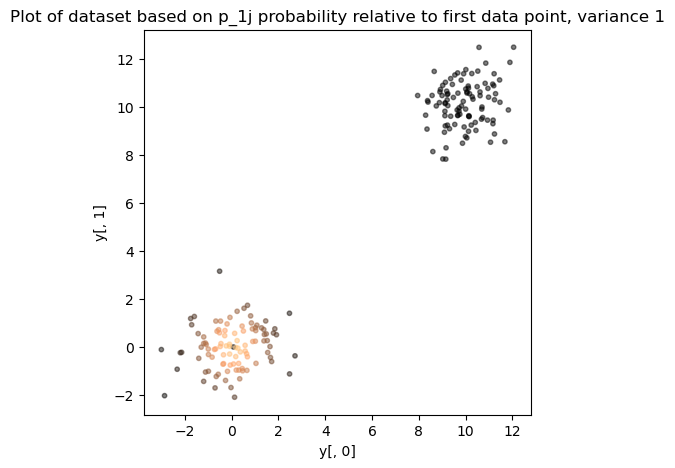

In [10]:
## part c
p_colors = p_ij[0] / (np.argmax(p_ij[0]) + 1)
plt.figure(figsize=(5,5))
plt.scatter(d[:, 0], d[:, 1], s=10, c=p_colors, alpha=0.5, cmap='copper')
plt.title("Plot of dataset based on p_1j probability relative to first data point, variance 1")
plt.xlabel('y[, 0]')
plt.ylabel('y[, 1]')
plt.show()

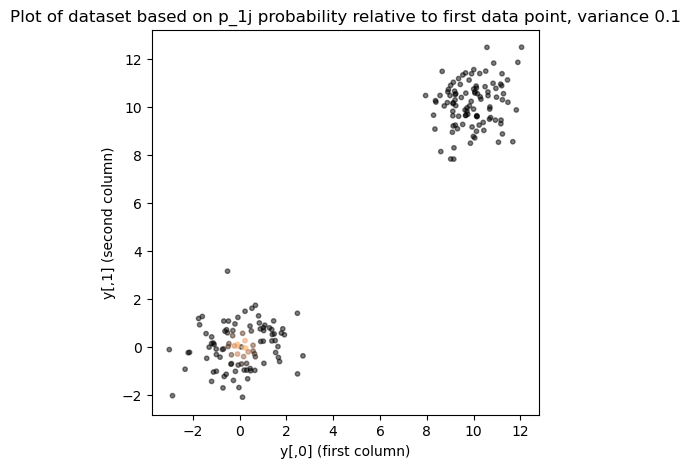

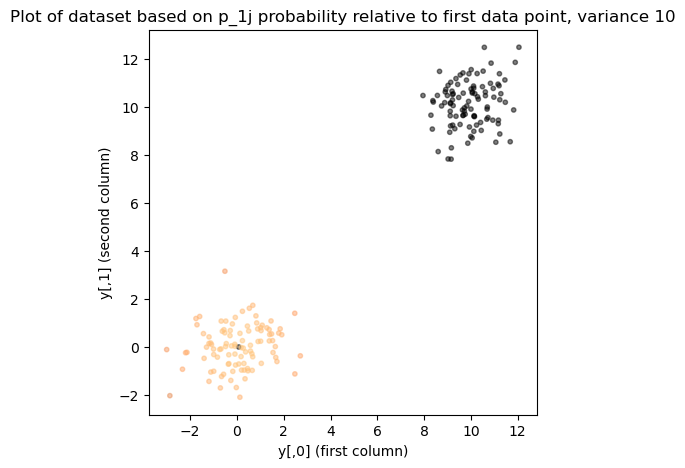

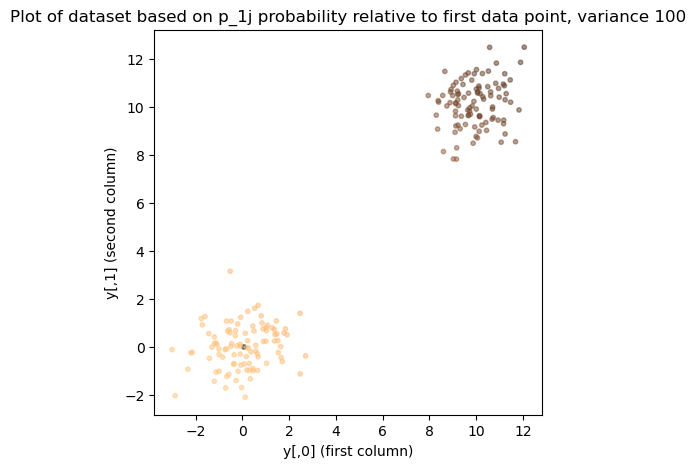

In [11]:
for v in [0.1, 10, 100]:
  p_ij_v = prob_ij(v, d)
  new_colors = p_ij_v[0] / (np.argmax(p_ij_v[0]) + 1)
  plt.figure(figsize=(5,5))
  plt.scatter(d[:, 0], d[:, 1], s=10, c=new_colors, alpha=0.5, cmap='copper')
  plt.title("Plot of dataset based on p_1j probability relative to first data point, variance " + str(v))
  plt.xlabel('y[,0] (first column)')
  plt.ylabel('y[,1] (second column)')

In [12]:
## part d: q_ij matrix
# y_i = x_i (projected by the identity)
# like in the p matrix, q_ii = 0
# https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

def q_ij_matrix(data):
  matrix = []
  denom = 0
  for k in range(N):
    for l in range(N):
      if l == k:  
        continue 
      denom += (1 + np.square(np.linalg.norm(data[k] - data[l])))**-1
  for i in range(N):
    row = []
    for j in range(N):
      if i == j:
        row.append(0)
        continue
      numerator = (1 + np.square(np.linalg.norm(data[i] - data[j])))**-1
      row.append(numerator / denom)
    matrix.append(row)
  return np.array(matrix)

q_ij = q_ij_matrix(d)
print(np.sum(q_ij))

1.000000000000002


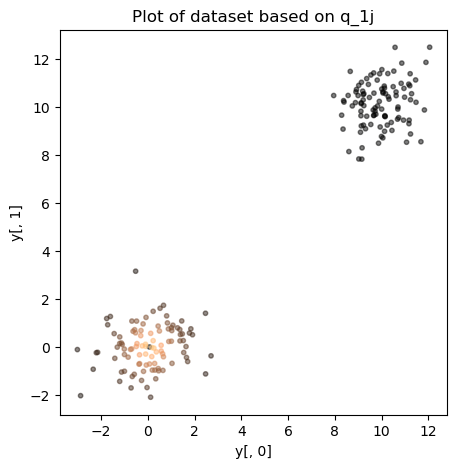

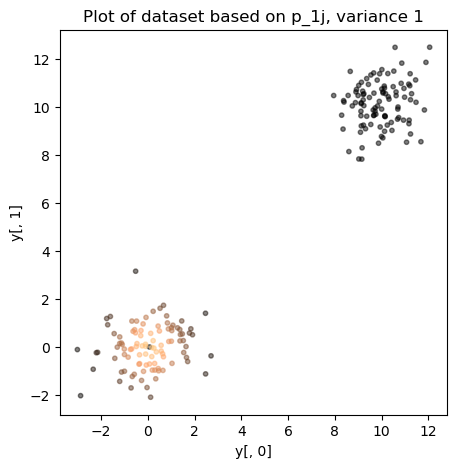

In [13]:
## part e
q_colors = q_ij[0] / (np.argmax(q_ij[0]) + 1)
plt.figure(figsize=(5,5))
plt.scatter(d[:, 0], d[:, 1], s=10, c=q_colors, alpha=0.5, cmap='copper')
plt.title("Plot of dataset based on q_1j")
plt.xlabel('y[, 0]')
plt.ylabel('y[, 1]')
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(d[:, 0], d[:, 1], s=10, c=p_colors, alpha=0.5, cmap='copper')
plt.title("Plot of dataset based on p_1j, variance 1")
plt.xlabel('y[, 0]')
plt.ylabel('y[, 1]')
plt.show()

The q_1j and p_1j, variance = 1 plots are similar; the only difference that I see is that it looks like the color of the points in the q_ij plot fade away a bit more in the first (bottom left) cluster. Points in the first cluster are a little less related to the first data point in q as they are in p.

In [14]:
## part f: KL-divergence

def kld(variance, data):
  p_ij = prob_ij(variance, data)
  q_ij = q_ij_matrix(data)
  res = 0
  for i in range(N):
    for j in range(N):
      if p_ij[i][j] == 0 or i == j:
        continue
      res += p_ij[i][j] * np.log(p_ij[i][j] / q_ij[i][j])
  return res

In [15]:
## part g
klds = {}
for var in [0.1, 1, 100]:
  k = kld(var, d)
  klds[var] = k
  print("KL-divergence: {}, variance: {}".format(k, var))

KL-divergence: 1.2980311536488287, variance: 0.1
KL-divergence: 0.10541352321790838, variance: 1
KL-divergence: 0.7473665628685009, variance: 100


KL-divergence tells us how much “surprise” there is from using q (the reference distribution) if the true distribution p is different. If the variance for the true distribution is too low or high, then we are more surprised when we see each datapoint x. However, if the variance is 1, we minimize this surprise (out of the given variances).

If the true distribution varies too little, then we are very surprised because the distributions are not that different from each other. If the true distribution varies too much, then we are more surprised than if the true distribution has unit variance.

## Part h
The variance hyperparameter matters because we want to minimize the KL-divergence of distribution P given Q in order to approximate the high-dimensional distribution P with a low-dimensional one Q (in this case, however, P and Q have the same dimensions), so we should choose the true distribution P with the variance that minimizes the KLD.

In [16]:
## part i
new_d = d.copy()
new_d[100:, 0] += 10

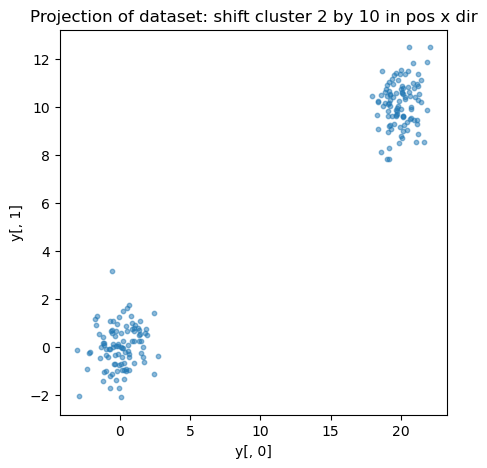

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(new_d[:, 0], new_d[:, 1], s=10, alpha=0.5)
plt.title("Projection of dataset: shift cluster 2 by 10 in pos x dir")
plt.xlabel('y[, 0]')
plt.ylabel('y[, 1]')
plt.show()

In [19]:
proj_data_kld = kld(1, new_d)
print(proj_data_kld)
print("Difference between original KL-divergence, new KL-divergence on projected data: {}".format(klds[1] - proj_data_kld))
print("Shifting the 2nd cluster by 10 in the pos x-direction reduces the KL-divergence (the clusters are now farther away from each other, so we are less surprised since the distributions are even more different than they were)")

0.09644098724664411
Difference between original KL-divergence, new KL-divergence on projected data: 0.008972535971264267
Shifting the 2nd cluster by 10 in the pos x-direction reduces the KL-divergence (the clusters are now farther away from each other, so we are less surprised since the distributions are even more different than they were)
